In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

LOCAL_PATH = '/Users/m.wehrens/Documents/git_repos/_UVA/bioDSC_website/bioDSC.github.io/static/'
cm_to_inch = 1/2.54

# Load data, note the ".T" at the end here
df_kohela = pd.read_csv(LOCAL_PATH+'data/kohela-et-al.csv', index_col=0).T
# create new 'masks'
epicardial_cells = df_kohela['WT1']>3
fibroblast_cells = df_kohela['COL2A1']>30
fat_cells = df_kohela['PPARG']>2
# Add cell type
df_kohela['Celltype'] = 'unknown'
df_kohela.loc[epicardial_cells,'Celltype'] = 'epicardial'
df_kohela.loc[fibroblast_cells, 'Celltype'] = 'fibroblast'
df_kohela.loc[fat_cells, 'Celltype'] = 'fat'
# Add conditions
df_kohela['Condition'] = 'unknown'
df_kohela.loc[df_kohela.index.str.contains('WT_'), 'Condition'] = 'WT'
df_kohela.loc[df_kohela.index.str.contains('mutant_'), 'Condition'] = 'mutant'

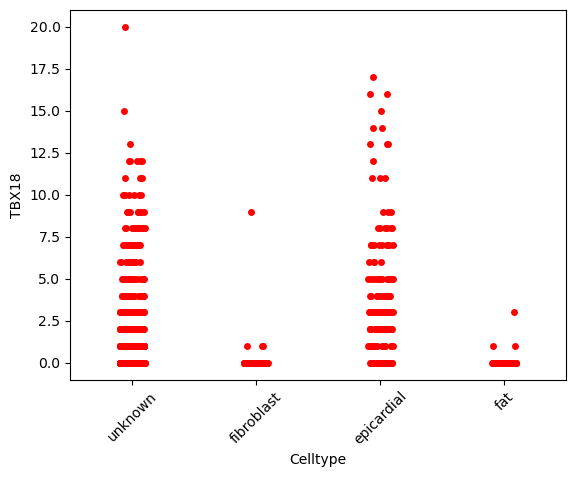

In [3]:


sns.stripplot(df_kohela, x='Celltype', y='TBX18', jitter=True, color='red')
plt.tick_params(axis='x', rotation=45)


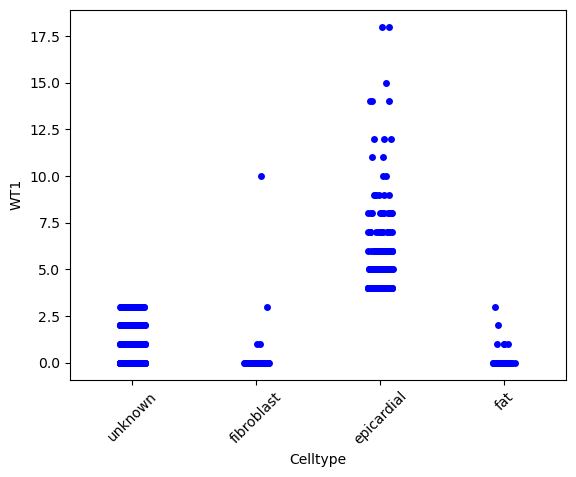

In [4]:
sns.stripplot(df_kohela, x='Celltype', y='WT1', jitter=True, color='blue')
plt.tick_params(axis='x', rotation=45)

<Axes: title={'center': 'Epicardial cells'}, xlabel='WT1', ylabel='TBX18'>

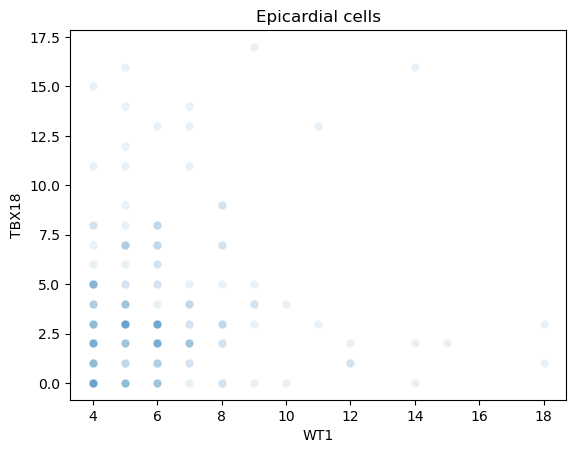

In [6]:
plt.title('Epicardial cells')
sns.scatterplot(df_kohela.loc[df_kohela['Celltype']=='epicardial',:], x='WT1', y='TBX18', alpha=.1)

<Axes: title={'center': 'Fibroblast cells'}, xlabel='WT1', ylabel='TBX18'>

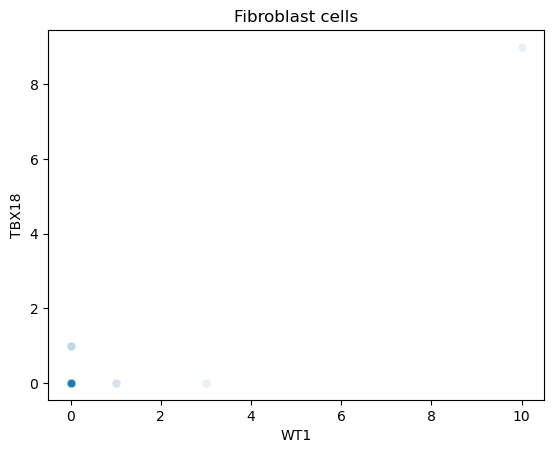

In [7]:
plt.title('Fibroblast cells')
sns.scatterplot(df_kohela.loc[df_kohela['Celltype']=='fibroblast',:], x='WT1', y='TBX18', alpha=.1)



Text(0.5, 1.0, 'Fat cells')

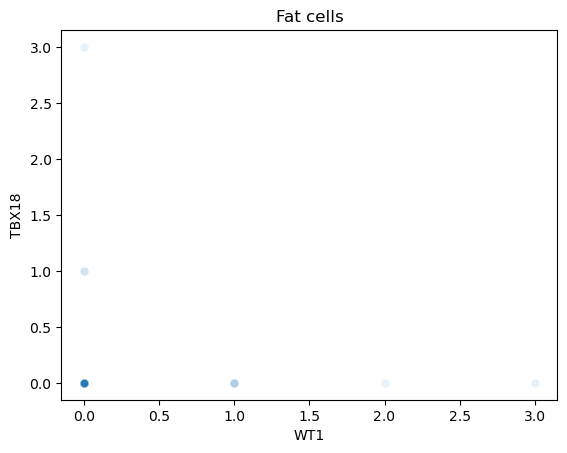

In [8]:
sns.scatterplot(df_kohela.loc[df_kohela['Celltype']=='fat',:], x='WT1', y='TBX18', alpha=.1)
plt.title('Fat cells')

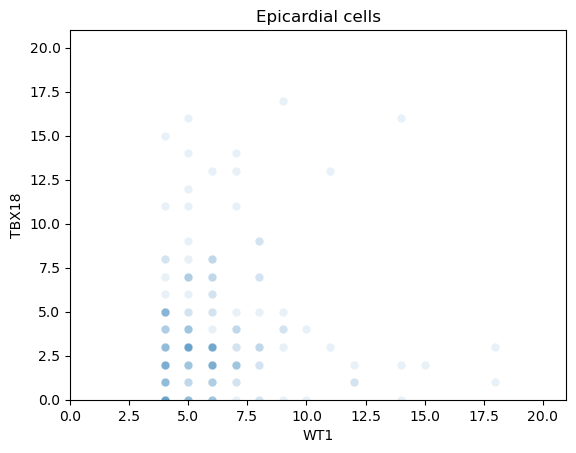

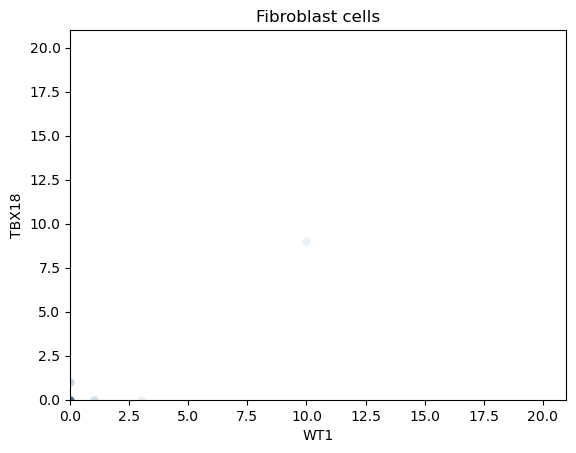

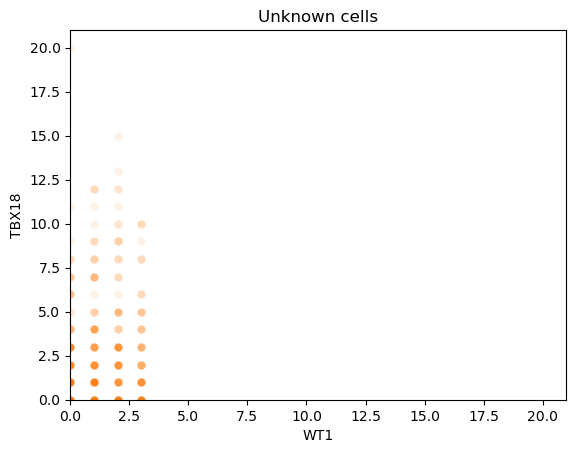

In [12]:

maxval = np.max(df_kohela.loc[:,['WT1','TBX18']])

plt.title('Epicardial cells')
sns.scatterplot(df_kohela.loc[df_kohela['Celltype']=='epicardial',:], x='WT1', y='TBX18', alpha=.1)
plt.xlim([0, maxval+1])
plt.ylim([0, maxval+1])
plt.show()

plt.title('Fibroblast cells')
sns.scatterplot(df_kohela.loc[df_kohela['Celltype']=='fibroblast',:], x='WT1', y='TBX18', alpha=.1)
plt.xlim([0, maxval+1])
plt.ylim([0, maxval+1])
plt.show()

sns.scatterplot(df_kohela.loc[df_kohela['Celltype']=='fat',:], x='WT1', y='TBX18', alpha=.1)
plt.title('Fat cells')
plt.xlim([0, maxval+1])
plt.ylim([0, maxval+1])

sns.scatterplot(df_kohela.loc[df_kohela['Celltype']=='unknown',:], x='WT1', y='TBX18', alpha=.1)
plt.title('Unknown cells')
plt.xlim([0, maxval+1])
plt.ylim([0, maxval+1])
plt.show()

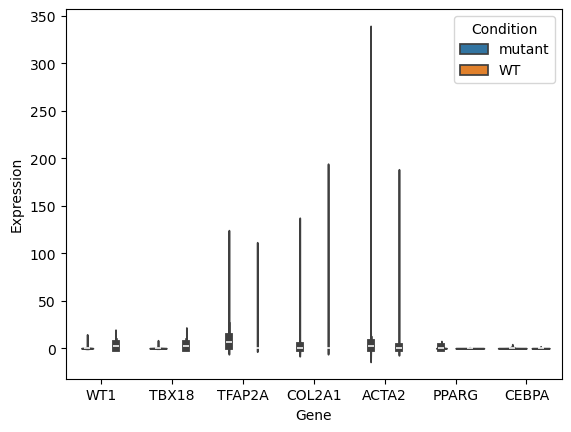

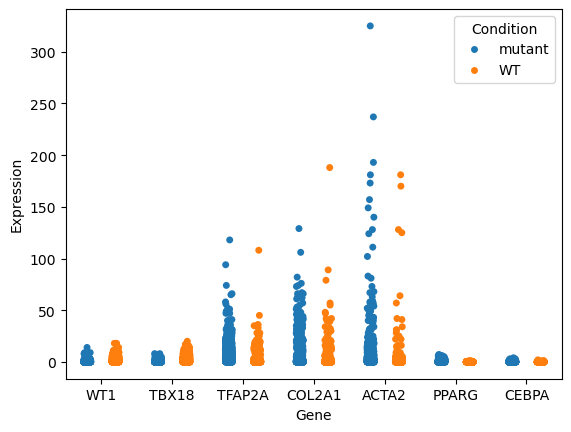

In [15]:
df_kohela_sel = df_kohela.loc[:,['WT1', 'TBX18', 'TFAP2A', 'COL2A1', 'ACTA2', 'PPARG', 'CEBPA','Celltype','Condition']]
df_kohela_melted = pd.melt(df_kohela_sel, id_vars=['Celltype','Condition'], var_name='Gene', value_name='Expression')
sns.violinplot(df_kohela_melted, x='Gene', y='Expression', hue='Condition')
plt.show()
sns.stripplot(df_kohela_melted, x='Gene', y='Expression', hue='Condition', dodge=True)
plt.show()